In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

In [6]:
data = pd.read_csv("Iris.csv")

# Data Analysis & Visualisation

In [7]:
print(data.head())
print(data.info()) 
print(data.describe())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None
               

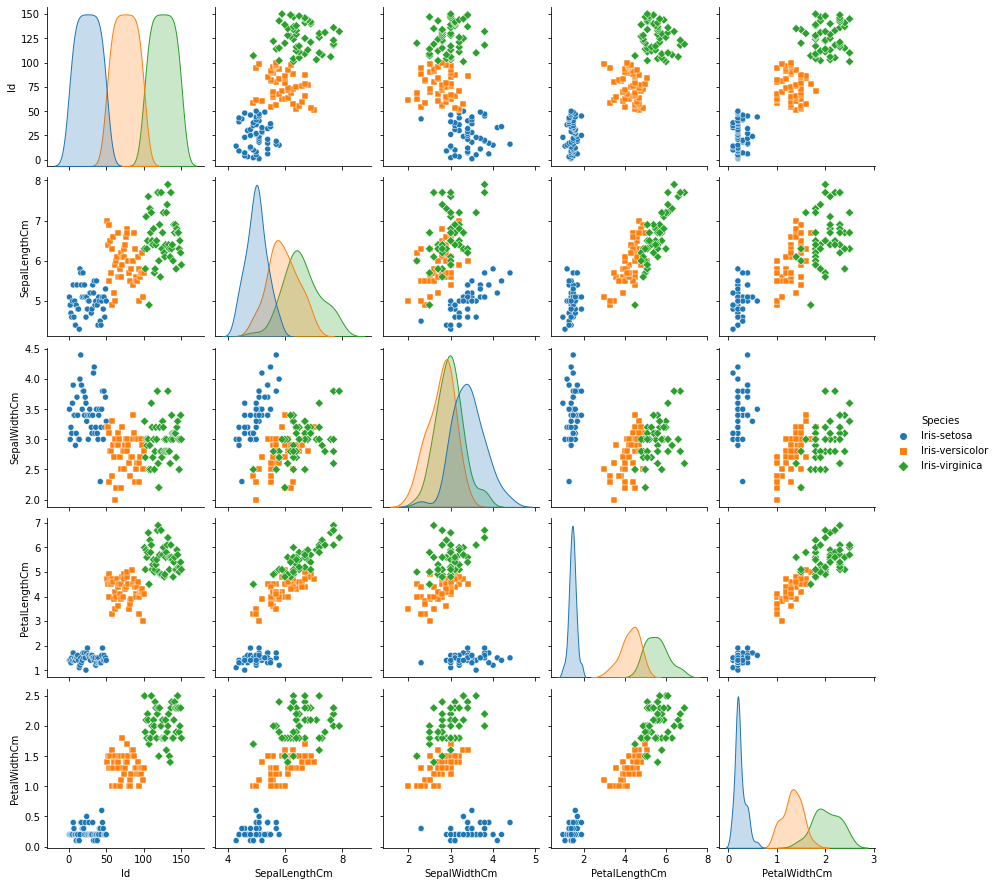

In [9]:
sns.pairplot(data, hue='Species', markers=["o", "s", "D"])
plt.show()

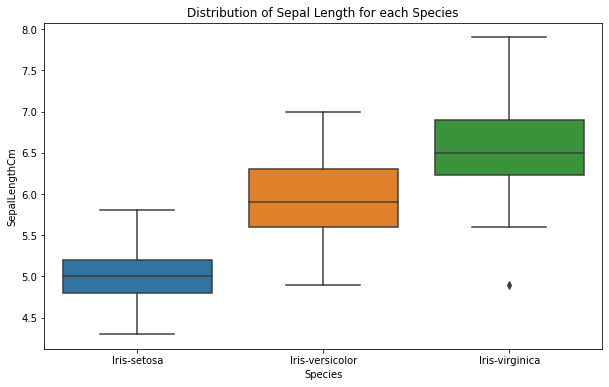

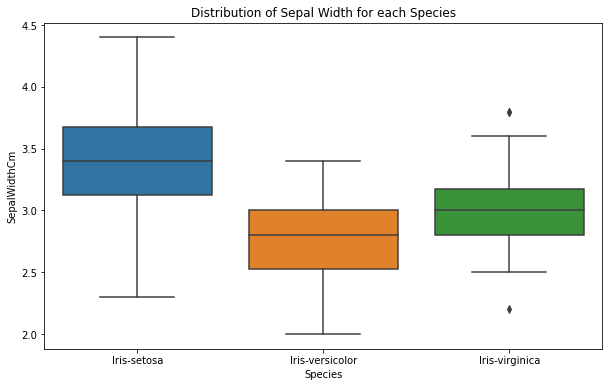

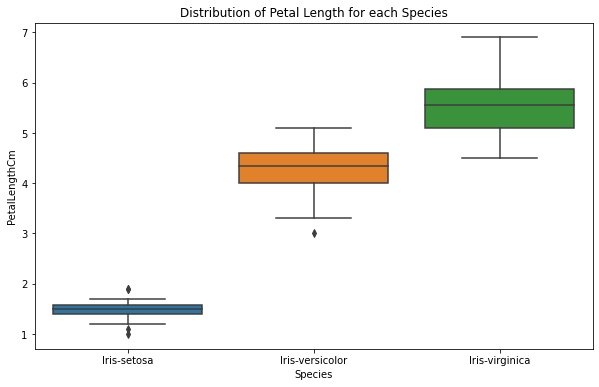

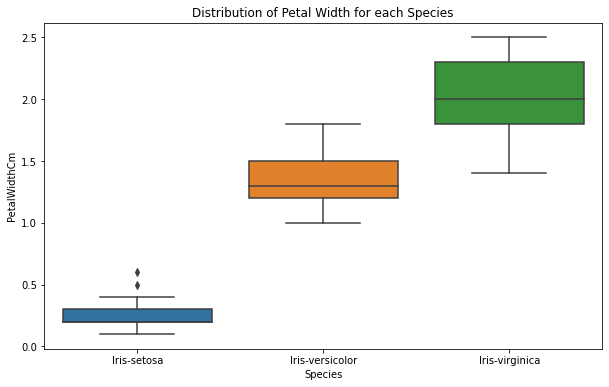

In [11]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Species", y="SepalLengthCm", data=data)
plt.title("Distribution of Sepal Length for each Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Species", y="SepalWidthCm", data=data)
plt.title("Distribution of Sepal Width for each Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Species", y="PetalLengthCm", data=data)
plt.title("Distribution of Petal Length for each Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="Species", y="PetalWidthCm", data=data)
plt.title("Distribution of Petal Width for each Species")
plt.show()

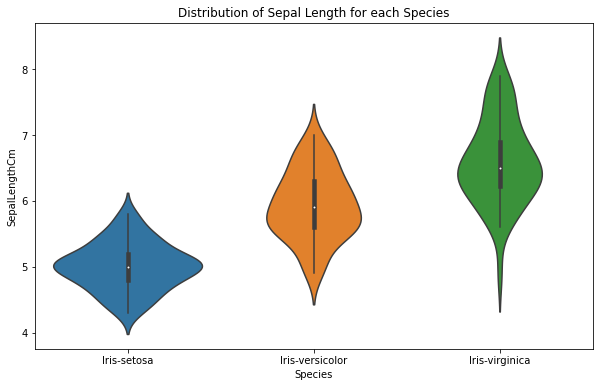

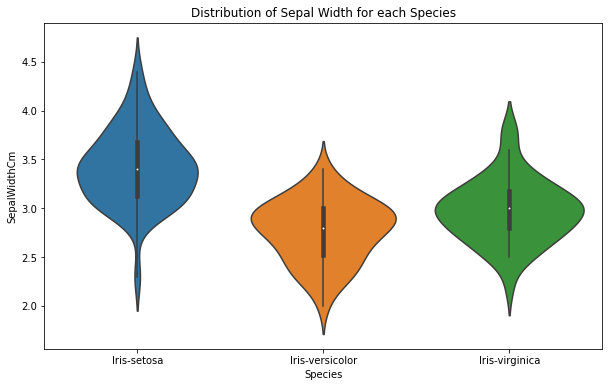

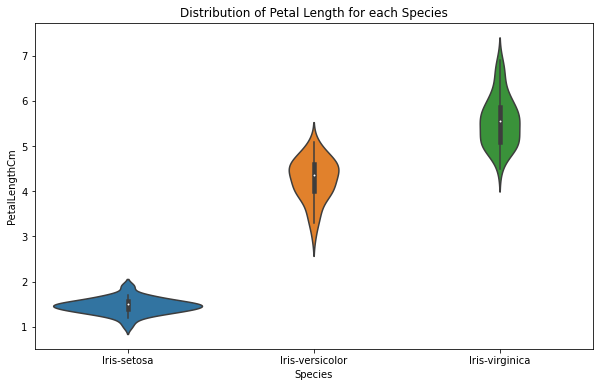

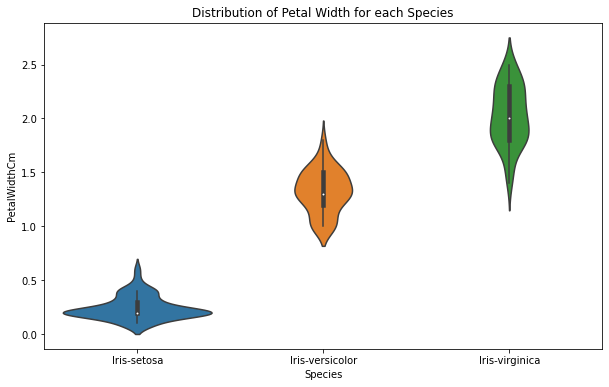

In [12]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="SepalLengthCm", data=data)
plt.title("Distribution of Sepal Length for each Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="SepalWidthCm", data=data)
plt.title("Distribution of Sepal Width for each Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="PetalLengthCm", data=data)
plt.title("Distribution of Petal Length for each Species")
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x="Species", y="PetalWidthCm", data=data)
plt.title("Distribution of Petal Width for each Species")
plt.show()

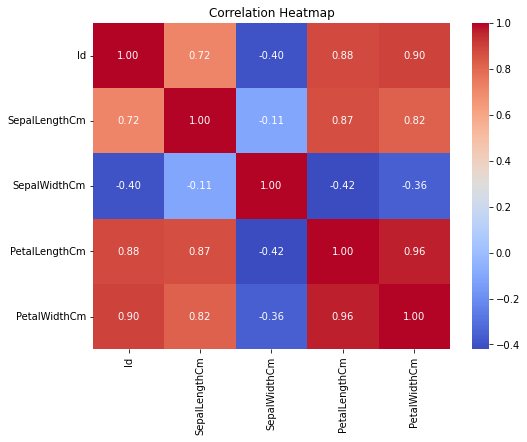

In [13]:
plt.figure(figsize=(8, 6))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# Encode categorical labels

In [14]:
X = data.drop("Species", axis=1)
y = data["Species"]

In [15]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Data splitting

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Model selection and hyperparameter tuning

In [17]:
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 150],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3]
}

In [18]:
xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                   

# Best hyperparameters found during GridSearchCV

In [19]:
best_params = grid_search.best_params_

# Model Training with Best Hyperparameters

In [20]:
best_xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, **best_params, random_state=42)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_class=3, num_parallel_tree=None,
              objective='multi:softmax', ...)

# Model Evaluation and classification

In [21]:
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 50}
Accuracy: 1.0
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

